In [9]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

In [18]:
#stage='noratiocutsingleshower'
stage ='pi0' #_dqdx'
stage ='sel2' #_dqdx'

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

t = rn.root2array(f,treename='shower_tree')
df = pd.DataFrame(t)
#df = df.query('shr_energy > 0. ')

a = rn.root2array(on,treename='shower_tree')
df0 = pd.DataFrame(a)
#df0 = df0.query('shr_energy > 0. ')

b = rn.root2array(off,treename='shower_tree')
df1 = pd.DataFrame(b)
#df1 = df1.query('shr_energy > 0. ')

#stage = 'sel2'

In [22]:
print df0.shape, df1.shape, df.shape
print df.info()
print df.shr_dirx.values

(804, 18) (36, 18) (5757, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5757 entries, 0 to 5756
Data columns (total 18 columns):
event                  5757 non-null int32
bkgd_id                5757 non-null int32
shr_startx             5757 non-null float32
shr_starty             5757 non-null float32
shr_startz             5757 non-null float32
shr_startw             5757 non-null float32
shr_startt             5757 non-null float32
shr_dirx               5757 non-null float32
shr_diry               5757 non-null float32
shr_dirz               5757 non-null float32
shr_energy             5757 non-null float32
shr_oangle             5757 non-null float32
shr_dedx               5757 non-null float32
shr_vtx_dist           5757 non-null float32
shr_trk_delta_theta    5757 non-null float32
shr_trk_delta_phi      5757 non-null float32
shr_ip                 5757 non-null float32
shr_rl                 5757 non-null float32
dtypes: float32(16), int32(2)
memory usage: 404.9 KB
None

In [12]:
dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'bkgd_id'

oth_v = df.query('bkgd_id == 0') #noise
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')

all_but_sig_v = df.query('bkgd_id != 2')

POTS :  0.492 4.23214
MC to OnBeam :  0.11625324304
Off to OnBeam:  2.168404449


In [13]:
oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
cc1pi0_outFV_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_outFV_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
nue_w = [ mc_to_onbeam for i in xrange(len(nue_v[var].values)) ] 
antinumu_w = [ mc_to_onbeam for i in xrange(len(antinumu_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nccex_w = [ mc_to_onbeam for i in xrange(len(nccex_v[var].values)) ] 
ccgamma_w = [ mc_to_onbeam for i in xrange(len(ccgamma_v[var].values)) ] 
kaon_w = [ mc_to_onbeam for i in xrange(len(kaon_v[var].values)) ] 
ccoth_w = [ mc_to_onbeam for i in xrange(len(ccoth_v[var].values)) ] 
ncoth_w = [ mc_to_onbeam for i in xrange(len(ncoth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 


#weights= []
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 
#print len(weights)

tot = len(all_w) * mc_to_onbeam + len(cos_ext_w) * off_to_on
print tot

177.321634542


In [14]:
print '\nSignal : ', len(sig_w) * mc_to_onbeam /tot

print '\nBackgorunds (CC 0 pi0): '
print ' CC Cex : ', len(cccex_w)*mc_to_onbeam / tot
print ' CC gamma : ', len(ccgamma_w)*mc_to_onbeam  / tot
print ' Kaon : ', len(kaon_w)*mc_to_onbeam / tot
print ' CCOther : ', len(ccoth_w) * mc_to_onbeam / tot

print '\nBackgorunds (NC >=1 pi0): '
print ' NC 1pi0 : ', len(nc1pi0_w)*mc_to_onbeam / tot

print '\nBackgorunds (NC 0 pi0): '
print ' NC Cex : ', len(nccex_w)*mc_to_onbeam / tot
print ' NCOther : ', len(ncoth_w)*mc_to_onbeam / tot

print '\nBackgorunds (Other): '
print ' CC 1pi0 out FV : ', len(cc1pi0_outFV_w)*mc_to_onbeam / tot
print ' Multiple pi0 : ', len(multpi0_w)*mc_to_onbeam / tot
print ' Nue : ', len(nue_w)*mc_to_onbeam / tot
print ' Antinumu : ', len(antinumu_w)*mc_to_onbeam / tot

print '\nBackgorunds (Cosmics): '
print ' No MCT Match : ', len(oth_w) *mc_to_onbeam  / tot
print ' Cosmic (Data) : ', len(cos_ext_w) * off_to_on / tot



Signal :  0.651673011477

Backgorunds (CC 0 pi0): 
 CC Cex :  0.0485148922025
 CC gamma :  0.025568659404
 Kaon :  0.00393363990831
 CCOther :  0.0950629644509

Backgorunds (NC >=1 pi0): 
 NC 1pi0 :  0.0380251857804

Backgorunds (NC 0 pi0): 
 NC Cex :  0.00393363990831
 NCOther :  0.0091784931194

Backgorunds (Other): 
 CC 1pi0 out FV :  0.0196681995416
 Multiple pi0 :  0.0721167316524
 Nue :  0.0045892465597
 Antinumu :  0.00131121330277

Backgorunds (Cosmics): 
 No MCT Match :  0.0
 Cosmic (Data) :  0.0244573027381


In [15]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel='',unit='cm'):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)*off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)
    
    weights = [cos_ext_w,cos_w,antinumu_w,nue_w,multpi0_w,cc1pi0_outFV_w,ncoth_w,nc1pi0_w,ccoth_w,cccex_w,\
           ccgamma_w,sig_w]
    
    lgd = 0
    
    labels_tst = ['Cosmic - In Time (Data)','Cosmic - $\\nu$ Coincident','anti $\\nu_{\mu}$','$\\nu_e$',\
                  'Mult $\pi^0$','CC 1-$\pi^0$ OutFV',\
                  'NC 0$\pi^0$','NC $\pi^0$',\
                 'CC Other','CC Cex','N-$\gamma$','Signal']
    
    colors_tst = ['lightgrey','dimgrey','darkgoldenrod','yellow','mediumpurple','purple','lime','darkgreen','lightskyblue','blue',\
                 'darkblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    
    ax.hist([df1[var].values,cos_v[var].values,antinumu_v[var].values,nue_v[var].values,\
        multpi0_v[var].values,cc1pi0_outFV_v[var].values,\
        ncoth_v[var].values,nc1pi0_v[var].values,\
        ccoth_v[var].values,cccex_v[var].values,ccgamma_v[var].values,\
        cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='OnBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    if var == 'shr_vtx_dist' or var == 'shr_startx' or var == 'shr_starty' or var == 'shr_startz' or\
       var == 'shr_dirx' or var == 'shr_diry' or var == 'shr_dirz': # or var=='shr_oangle':
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,1))
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
   
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    #plt.ylabel('N Events',fontsize=18,weight='bold')

    if unit == 'rad' or unit == 'asym' or var =='shr_dirx' or var=='shr_diry' or var =='shr_dirz':
        plt.ylabel('N Events / %0.2f %s '%(bin_width,unit),fontsize=18,weight='bold')
    elif unit == 'empty':
        plt.ylabel('N Events',fontsize=18,weight='bold')
    else:
        plt.ylabel('N Events / %i %s '%(bin_width,unit),fontsize=18,weight='bold')
    
    plt.text(0.57,1.01,'MicroBooNE Preliminary',weight='bold',color='r',fontsize=14,transform = ax.transAxes)
    
    plt.ylim(0)
    #plt.yscale('log')
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

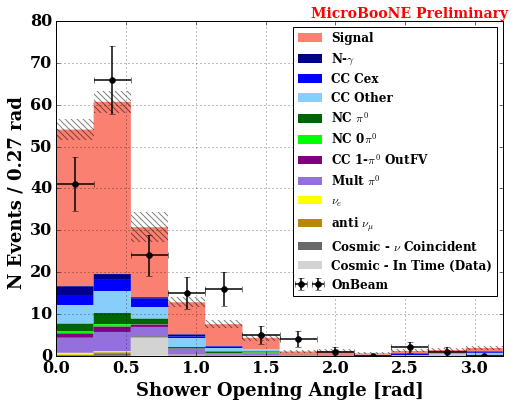

In [16]:
makeOnOffPlots('shr_oangle',0,3.2,nbins=12,xlabel='Shower Opening Angle [rad]',unit='rad')


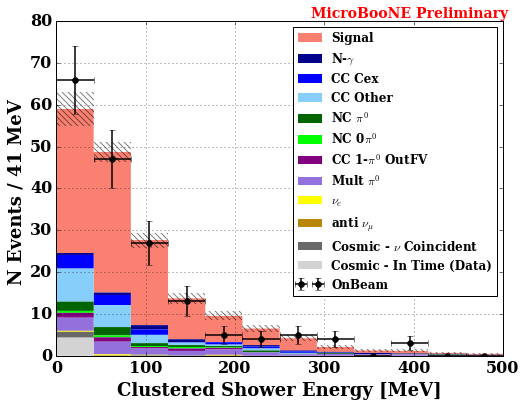

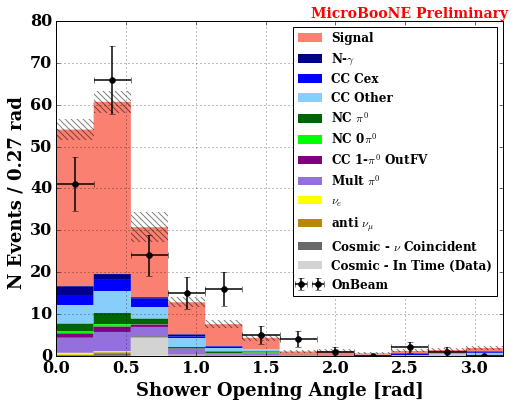

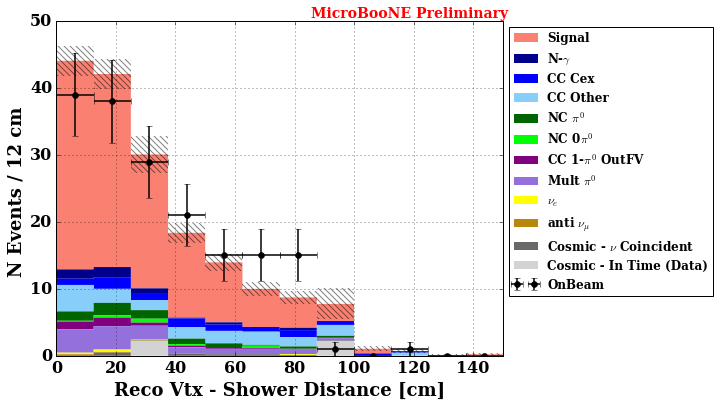

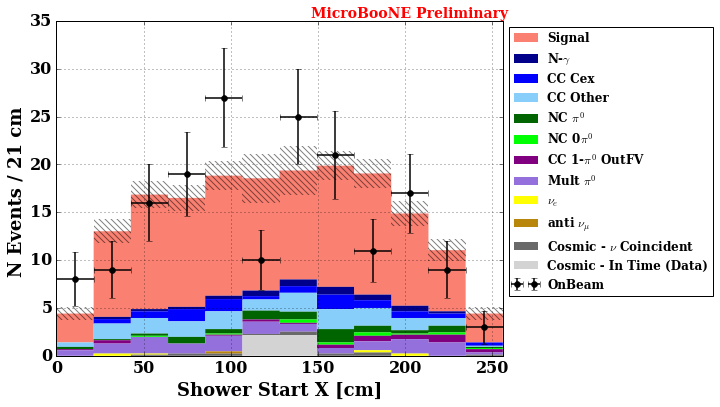

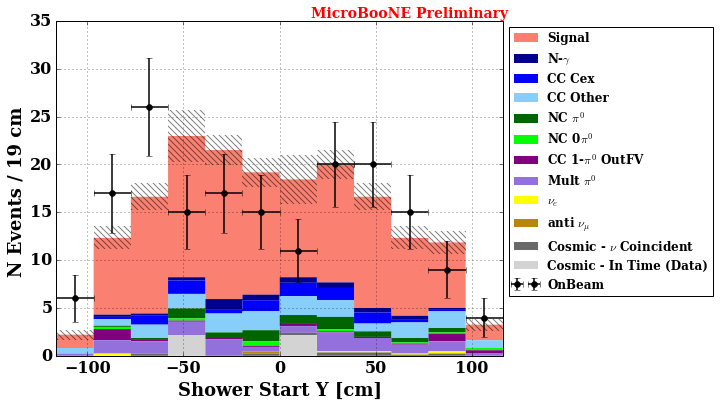

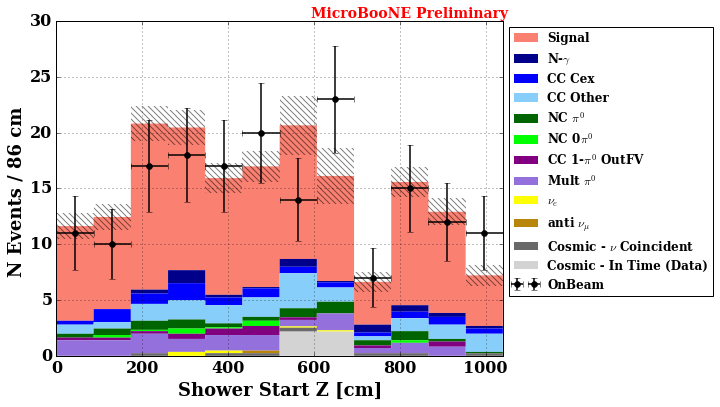

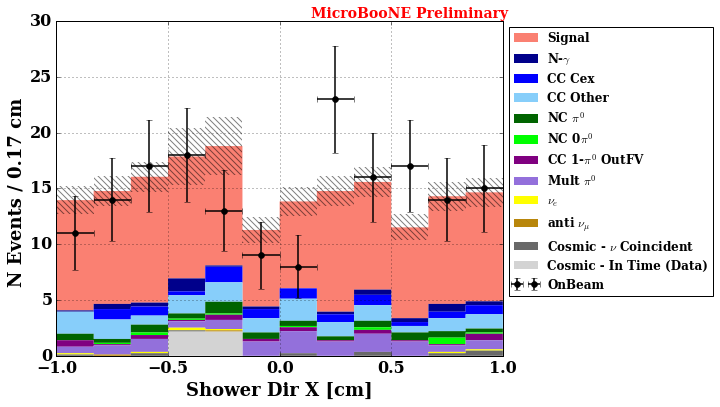

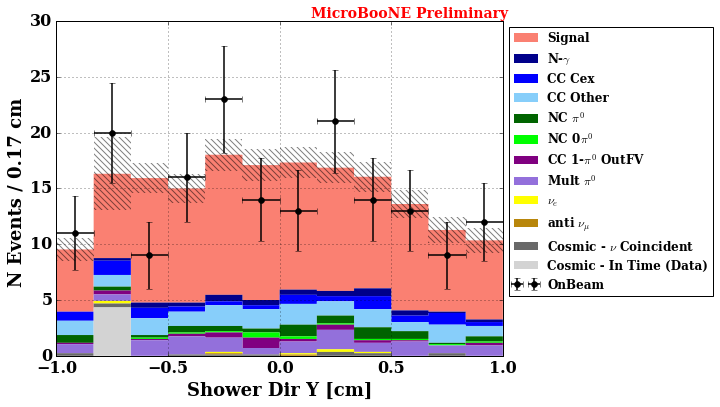

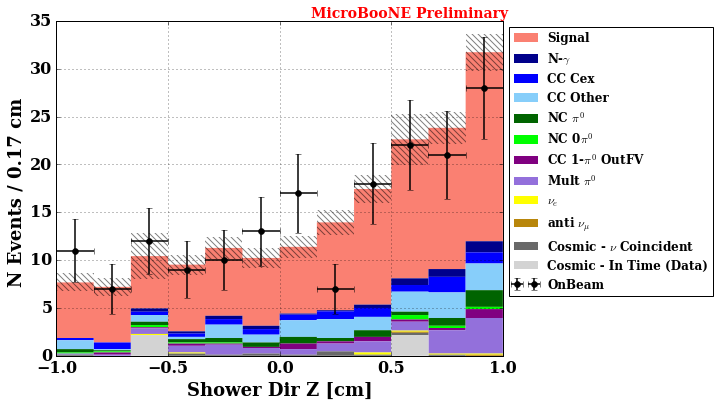

In [17]:
#makeOnOffPlots('shr_energy',0,300,xlabel='Shower Energy [MeV]')
makeOnOffPlots('shr_energy',0,500,nbins=12,xlabel='Clustered Shower Energy [MeV]',unit='MeV')

makeOnOffPlots('shr_oangle',0,3.2,nbins=12,xlabel='Shower Opening Angle [rad]',unit='rad')
makeOnOffPlots('shr_vtx_dist',0,150,nbins=12,xlabel='Reco Vtx - Shower Distance [cm]')

makeOnOffPlots('shr_startx',0,256,nbins=12,xlabel='Shower Start X [cm]')
makeOnOffPlots('shr_starty',-116,116,nbins=12,xlabel='Shower Start Y [cm]')
makeOnOffPlots('shr_startz',0,1040,nbins=12,xlabel='Shower Start Z [cm]')
makeOnOffPlots('shr_dirx',-1,1,nbins=12,xlabel='Shower Dir X [cm]')
makeOnOffPlots('shr_diry',-1,1,nbins=12,xlabel='Shower Dir Y [cm]')
makeOnOffPlots('shr_dirz',-1,1,nbins=12,xlabel='Shower Dir Z [cm]')

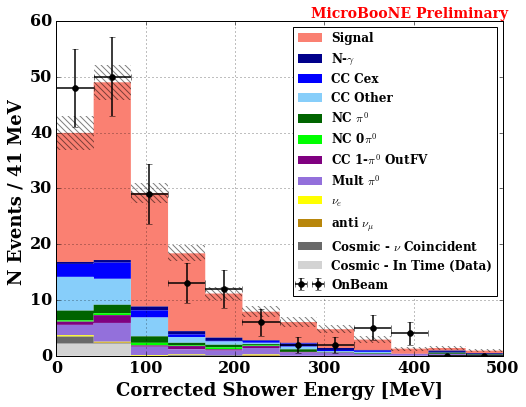

In [21]:
#Single Shower plots
df0['shr_energy_corr'] = df0['shr_energy'] / 0.77
df1['shr_energy_corr'] = df1['shr_energy'] / 0.77
df['shr_energy_corr'] = df['shr_energy'] / 0.77

oth_v = df.query('bkgd_id == 0') #noise
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')

all_but_sig_v = df.query('bkgd_id != 2')

makeOnOffPlots('shr_energy_corr',0,500,nbins=12,xlabel='Corrected Shower Energy [MeV]',unit='MeV')
#makeOnOffPlots('shr_energy_corr',0,300,xlabel='Corrected Shower Energy [MeV]')

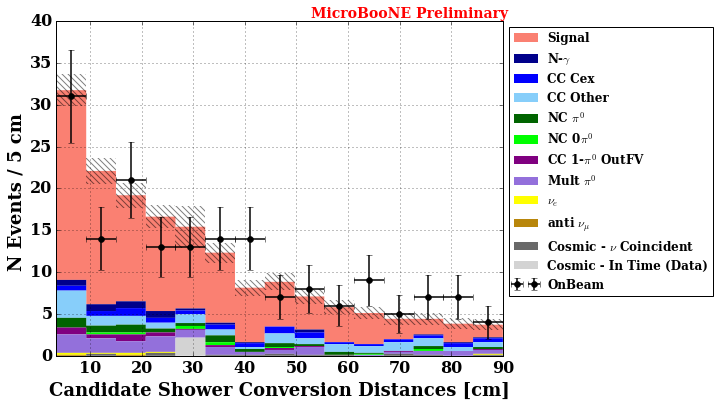

In [22]:
makeOnOffPlots('shr_vtx_dist',3.5,90,nbins=15,xlabel='Candidate Shower Conversion Distances [cm]')
